In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn import metrics

In [18]:
data = pd.read_csv('PM2_5Dataset.csv',index_col ='date',parse_dates=True)

data = data.bfill()

X=data.iloc[:,[0,2,3,4,5,6,7,8,9]].values
y=data.iloc[:,10].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [19]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rs_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rs =cross_val_score(model,X_train, y_train, cv = kf,scoring='r2')
    return(rs)

In [20]:
lr = LinearRegression()
score = rmsle_cv(lr)
rsscore = rs_cv(lr)
# print(score)
print("\nLR RMSE score of training data : {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# print(rsscore)
print("\nLR R2 score of training data: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))


LR RMSE score of training data : 42.8770 (5.8472)


LR R2 score of training data: 0.7731 (0.0923)



In [21]:
#Random forest
RF = RandomForestRegressor(random_state=1, n_estimators=100)
score = rmsle_cv(RF)
rsscore = rs_cv(RF)
print(score)
print("\nRF RMSE score of training data : {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\nRF R2 score of training data: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))

[37.78632566 44.16300979 32.42132745 29.91489532 50.18636905]

RF RMSE score of training data : 38.8944 (7.4703)

[0.8690742  0.71929387 0.7870455  0.94820399 0.73196276]

RF R2 score of training data: 0.8111 (0.0865)



In [22]:
KNN =KNeighborsRegressor(n_neighbors=2)
score = rmsle_cv(KNN)
rsscore = rs_cv(KNN)
print(score)
print("\nKNN RMSE score of training data: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\nKNN R2 score of training data: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))

[41.04905602 41.77190044 36.2988751  27.42670483 34.58597483]

KNN RMSE score of training data: 36.2265 (5.1796)

[0.84548798 0.74886743 0.73306128 0.95646199 0.8727014 ]

KNN R2 score of training data: 0.8313 (0.0825)



In [23]:
GBoost = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
rsscore = rs_cv(GBoost)
print(score)
print("\n GBoost RMSE score of training data: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\n GBoost R2 score of training data: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))


[37.98313953 41.39670743 28.44815406 38.06923926 47.88821559]

 GBoost RMSE score of training data: 38.7571 (6.2879)

[0.86770676 0.75335849 0.83604169 0.91611782 0.75594883]

 GBoost R2 score of training data: 0.8258 (0.0635)



In [24]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
rsscore = rs_cv(model_xgb)
print(score)
print("\n model_xgb RMSE score of training data: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\n model_xgb R2 score of training data: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))


[32.64831052 38.25282724 29.69281855 27.12463601 44.80298167]

 model_xgb RMSE score of training data: 34.5043 (6.3430)

[0.90225887 0.78939841 0.82138082 0.95741574 0.78638221]

 model_xgb R2 score of training data: 0.8514 (0.0675)



In [25]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
score = rmsle_cv(svr)
rsscore = rs_cv(svr)
print(score)
print("\n svr RMSE score of training data: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\n svr R2 score of training data:: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))

[45.30995137 41.28833565 40.78336764 42.08424481 54.4685701 ]

 svr RMSE score of training data: 44.7869 (5.0908)

[0.81174648 0.75464816 0.66302987 0.89749138 0.68427024]

 svr R2 score of training data:: 0.7622 (0.0857)



In [26]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
rsscore = rs_cv(lasso)
print(score)
print("\nLasso RMSE score of training data: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\nLasso R2 score of training data: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))

[44.99307407 42.79697533 40.29576575 34.21432276 52.08272998]

Lasso RMSE score of training data: 42.8766 (5.8470)

[0.81437039 0.73639071 0.67103926 0.93224565 0.71132375]

Lasso R2 score of training data: 0.7731 (0.0923)



In [66]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
#         print(self.base_models)
        self.meta_model = meta_model
#         print(self.meta_model)
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
#         print(self.base_models)
        self.base_models_ = [list() for x in self.base_models]
#         print(self.base_models_)
        self.meta_model_ = clone(self.meta_model)
#         print(self.meta_model_)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
#         print(kfold)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        print(out_of_fold_predictions.shape)
        for i, model in enumerate(self.base_models):
#             print(i,model)
            for train_index, holdout_index in kfold.split(X,y):
#                 print(len(train_index), len(holdout_index))
                instance = clone(model)
#                 print(instance)
                self.base_models_[i].append(instance)
#                 print(self.base_models_[i])
#                 print(len(X[train_index]), len(y[train_index]))
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                print(y_pred,y[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
#                 print(out_of_fold_predictions.shape)
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
#         print(self.meta_model_)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
#         print(meta_features)
        return self.meta_model_.predict(meta_features)

In [67]:
stacked_averaged_models = StackingAveragedModels(base_models = (KNN,lr,RF),meta_model = svr)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models RMSE score of training data: {:.4f} ({:.4f})".format(score.mean() , score.std()))
rsscore = rs_cv(stacked_averaged_models)
print("\nStaking r2 R2 score of training data: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))



(118, 3)
[338.5 176.  154.5 125.  383.  194.5 350.5 145.5 159.  338.5 132.5 385.5
 121.5 237.5 472.5 118.  472.5 245.5 216.  368.5  93.  386.5 184.5 145.5] [265. 172. 156. 120. 298. 223. 233. 123. 165. 351. 106. 298.  99. 211.
 495. 113. 384. 224. 192. 247. 108. 340. 184. 148.]
[126.  121.5 146.5 502.  102.5 186.5 234.  208.  338.5  92.5 236.  114.
 155.  135.5 352.  135.5 126.5 406.  137.5 287.  376.  182.  104.5 170. ] [141. 256. 140. 436. 124. 209. 201. 242. 281.  79. 188. 150. 168. 128.
 413. 151.  82. 400. 116. 360. 359. 190.  92. 178.]
[233.  184.  128.5 184.5 125.5 176.5 268.5 135.5 112.5 107.5 196.5 148.5
  95.  177.5 188.   93.5 178.  226.5  96.   97.5 161.5 139.   90.  127. ] [249. 154. 104. 138. 100. 117. 296. 140.  83. 118. 207. 113. 111. 105.
 154. 110. 162. 233.  90. 121. 155. 151. 108. 134.]
[162.  173.  159.5 123.5 146.5 294.  395.  127.5 245.5 194.5 138.5 106.5
 161.5 132.  147.5 465.5  87.  128.  296.5 154.  233.  355.  164.5] [151. 185. 121. 130. 102. 272. 342. 115. 

[422.1  149.12 276.6  156.01 110.58 198.9  207.73 202.32 311.62  90.61
 198.03 116.48 150.73 131.94 299.54 131.03 114.23 401.33 122.73 271.42
 323.1  174.29 105.28 156.84] [424. 174. 246. 204.  95. 209. 201. 242. 281.  79. 188. 150. 168. 128.
 413. 151.  82. 400. 116. 360. 359. 190.  92. 178.]
[179.69 301.16 162.43 202.35 161.12  98.7   85.22 134.33 212.05 121.4
 190.5  131.55  95.16 119.05 193.71 106.47 180.13 216.32  96.   105.83
 160.68 167.3  104.05 123.24] [168. 208. 131. 172. 153.  77.  83. 155. 200. 118. 207. 113. 111. 105.
 154. 110. 162. 233.  90. 121. 155. 151. 108. 134.]
[189.84 373.9  177.7  326.44 165.71 231.83 403.27 126.52 247.32 186.26
 116.18 125.9  137.27 106.72 142.29 418.4   86.61 127.85 284.87 150.85
 225.07 210.85 184.05] [203. 451. 145. 281. 163. 115. 398. 115. 219. 141. 148. 130. 155.  98.
 144. 509.  92. 120. 341. 155. 229. 197. 157.]
[139.93 114.64  92.47 286.9  173.96 125.22 143.56 344.41 157.53  94.72
 403.35 137.16 121.55 447.99 401.36 145.01 103.64 156.9  

[413.76 145.93 277.25 150.66 128.33 109.1  148.29 269.96 196.94 148.56
 361.9  173.43 274.73  85.99 114.01 306.31 122.67 113.21 313.22 104.88
 352.14 174.96 123.5   99.69] [424. 174. 246. 204.  95.  99. 141. 265. 249. 185. 342. 207. 219. 111.
 148. 413. 151.  82. 247. 116. 359. 190. 148.  92.]
[176.91 291.78 158.48 186.94 159.01 108.04  84.95 133.37 217.77 136.77
 263.36 116.9  152.06 208.19 297.6  258.85 171.04 289.61 160.24 138.53
 107.71 297.02 172.24 143.95] [168. 208. 131. 172. 153.  77.  83. 155. 200. 141. 164. 138. 120. 209.
 281. 165. 178. 351. 151. 108. 108. 360. 178. 134.]
[173.96 365.69 185.19 332.76 161.26 154.15 371.33 109.28 154.61 386.82
  93.16 128.66 124.89 124.95 259.36 132.7  118.55 136.9  140.93 106.26
 147.12 226.87 225.09 174.32] [203. 451. 145. 281. 163. 115. 398. 256. 140. 436. 100. 140. 153. 102.
 290. 118. 115. 143. 155. 169. 155. 229. 197. 157.]
[139.64 106.06 117.3  161.56 119.35  99.42 175.74 147.38 237.28 288.24
 203.23 148.88 186.74 194.03  83.83 128.61 1

[264.26 196.81 152.21 141.11 330.22 233.04 323.71 135.1  253.12 292.92
 132.71 280.02 126.8  212.93 449.35 125.14 453.36 229.8  193.69 344.52
 115.35 365.68 194.04 137.64] [265. 172. 156. 120. 298. 223. 233. 123. 165. 351. 106. 298.  99. 211.
 495. 113. 384. 224. 192. 247. 108. 340. 184. 148.]
[126.44 119.38 160.13 413.26 115.23 198.81 218.12 209.59 286.28 100.98
 200.12 120.18 149.41 131.11 302.57 120.36 114.07 392.53 124.12 296.79
 329.25 182.64 110.15 162.11] [141. 256. 140. 436. 124. 209. 201. 242. 281.  79. 188. 150. 168. 128.
 413. 151.  82. 400. 116. 360. 359. 190.  92. 178.]
[203.95 148.14 109.24 154.29 108.61 240.83 286.64 119.46 130.   126.89
 163.95 140.25 100.39 128.97 170.   109.87 188.39 210.76  98.26 107.94
 157.54 148.93 125.57 135.68] [249. 154. 104. 138. 100. 117. 296. 140.  83. 118. 207. 113. 111. 105.
 154. 110. 162. 233.  90. 121. 155. 151. 108. 134.]
[151.34 151.13 150.71 133.32 126.25 273.2  382.35 144.95 285.41 199.72
 118.89 123.06 144.91 110.97 149.74 426.3  1

[155.96 126.27  86.41 284.14 116.98 160.96 155.95 180.44 156.99 277.7
 121.85 265.7  123.31 209.7  454.13 123.7  465.17 215.04 164.59 317.89
 124.5  368.91 174.1  134.93] [131. 105.  57. 397.  99. 141. 151. 249. 121. 296.  83. 298.  99. 211.
 495. 113. 384. 224. 192. 247. 108. 340. 184. 148.]
[421.46 147.4  283.03 153.9  147.6  256.32 124.88 175.3  146.61 135.32
 347.23 135.64 154.85 124.98 295.55 123.55 107.43 408.18 124.28 305.42
 308.71 170.68  85.48 159.88] [424. 174. 246. 204.  95. 265.  95. 172. 185. 130. 342. 150. 168. 128.
 413. 151.  82. 400. 116. 360. 359. 190.  92. 178.]
[176.8  290.61 169.82 212.28 163.44  97.17  97.82 133.25 220.59 137.02
 183.36 310.7  112.96 138.27 244.52  94.59 188.02 202.1   99.6  102.73
 157.71 185.83 173.17 136.05] [168. 208. 131. 172. 153.  77.  83. 155. 200. 141. 140. 164. 138. 120.
 223. 110. 162. 233.  90. 121. 155. 151. 108. 134.]
[193.15 380.36 184.09 346.6  162.15 135.8  409.53 115.75 407.73 107.22
 126.32 126.82 121.52 108.1  133.78 416.98  8

[154.11 109.48  89.93 277.62 154.46 113.3  177.8  159.67 149.6  273.24
 112.99 215.05 237.34 129.91 124.72 273.31 154.19 202.95 183.07 141.29
 416.02 114.65 155.63 145.19] [131. 105.  57. 397. 151.  95. 172. 121. 130. 296.  83. 223. 233. 113.
 133. 353. 152. 188. 154. 150. 509.  99. 155. 118.]
[431.48 151.1  306.03 150.13 130.63 111.13 151.69 297.78 186.27 150.08
 373.95 181.45 264.87  85.05 118.37 370.58 117.37 142.91  81.79 113.09
 102.52 112.12 119.78 146.77] [424. 174. 246. 204.  95.  99. 141. 265. 249. 185. 342. 207. 219. 111.
 148. 412.  98. 144. 110. 121.  92. 113. 120. 151.]
[169.27 265.47 155.62 234.42 159.7  103.77  90.39 134.27 214.69 142.94
 310.14 111.24 144.96 198.49 384.49 271.01 166.55 298.99 275.87 130.92
 435.74 427.37 124.96 426.4 ] [168. 208. 131. 172. 153.  77.  83. 155. 200. 141. 164. 138. 120. 209.
 281. 165. 178. 351. 298. 113. 400. 400. 128. 390.]
[180.16 365.48 180.68 357.73 166.89 118.05 435.35 121.98 160.86 402.91
 105.85 132.8  132.12 122.35 283.55 119.93 1

In [68]:

#testing 

stacked_averaged_models.fit(X_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_pred = stacked_averaged_models.predict(X_test)
# # print(y_train,stacked_pred)
# df = pd.DataFrame({'Actual':y_test, 'Predicted': stacked_pred})
# print(df)
# df.plot(figsize=(20,8))


# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, stacked_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, stacked_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, stacked_pred)))
# print('r ^2 ',r2_score(y_test, stacked_pred))
# # print('score',ereg.score(y_test, y_pred))
# print('explained_variance_score',explained_variance_score(y_test, stacked_pred))
# print('max_error',max_error(y_test, stacked_pred))

(148, 3)
[153.  400.  136.  159.  184.5 116.  105.5 153.5 338.5 105.5 126.5 122.5
 194.5 172.  132.   91.  338.5 117.  329.  133.5 121.5 159.5 502.  137.
 132.  137.  126.5 216.  233.  137. ] [131. 424. 174. 105. 145. 155.  99. 141. 265.  95. 120. 153. 223. 178.
 133.  79. 351. 115. 298.  98.  99. 105. 384. 120. 151. 128.  82. 192.
 229. 148.]
[355.  207.   85.5 432.  152.5 179.  143.  264.  135.5 418.  281.  220.5
 302.5 194.5 118.  135.5 184.  143.   97.   89.  406.  105.  355.  139.
 220.5 135.5 105.  105.5 306.   97. ] [246. 204.  57. 397. 151. 172. 130. 296. 140. 342. 219. 242. 281. 141.
 148. 152. 154. 144. 110.  90. 400. 149. 390. 151. 224. 151. 169. 116.
 197.  92.]
[272.5 197.  146.  159.5  91.  233.  167.  115.5 173.  137.5 112.5 170.
 292.  153.5 148.5 178.5  87.5 337.5 212.  217.  222.5 106.   97.  121.5
 386.5 148.5 432.  153.5 182.  121.5] [208.  95. 131. 153.  77. 249. 154. 141. 185. 121.  83. 209. 233. 207.
 113. 165. 111. 353. 188. 233. 211. 121.  92. 100. 341. 155. 34

    Actual   Predicted
0    161.0  165.434128
1    154.0  156.101166
2    248.0  239.512283
3    145.0  118.765945
4    441.0  401.668152
5    272.0  358.924988
6    146.0  142.644348
7    105.0   79.599777
8    217.0  202.764145
9    135.0  111.185310
10   194.0  179.291275
11   191.0  172.955063
12   162.0  159.684662
13   109.0   97.267609
14   142.0  117.741386
15   122.0  132.374069
16   728.0  430.011200
17    98.0   94.799225
18   257.0  186.591049
19   151.0  118.216118
20   137.0  145.548157
21   143.0  135.454422
22   420.0  425.632996
23   134.0  167.843628
24    59.0   72.728691
25   157.0  134.749298
26   115.0   89.922203
27   114.0  154.516373
28   112.0  131.985123
29   446.0  404.144623
30   204.0  221.335999
31    89.0  158.137772
32    69.0   80.213554
33   135.0  126.177505
34   207.0  222.309738
35   146.0  159.552917
36   111.0  127.181717
37   119.0  112.604851
38   334.0  325.856445
39   138.0  118.351479
40   104.0  131.970779
41   134.0   96.346291
42   326.0 

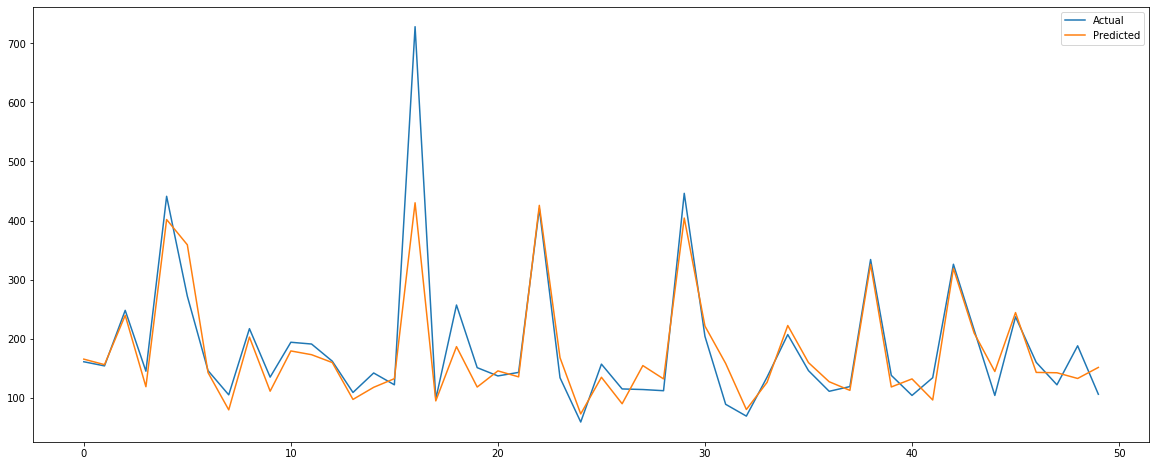

In [14]:
# model_xgb.fit(X_train, y_train)
# xgb_train_pred = model_xgb.predict(X_test)
# # print(len(xgb_train_pred),len(y_test))
# df = pd.DataFrame({'Actual':y_test, 'Predicted': xgb_train_pred})
# print(df)
# df.plot(figsize=(20,8))
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_train_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_train_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_train_pred)))
# print('r ^2 ',r2_score(y_test, xgb_train_pred))
# # print('score',ereg.score(y_test, y_pred))
# print('explained_variance_score',explained_variance_score(y_test, xgb_train_pred))
# print('max_error',max_error(y_test, xgb_train_pred))

    Actual  Predicted
0    161.0      149.5
1    154.0      152.5
2    248.0      241.0
3    145.0      114.5
4    441.0      406.0
5    272.0      383.0
6    146.0      149.5
7    105.0      101.5
8    217.0      194.5
9    135.0      105.0
10   194.0      209.0
11   191.0      181.5
12   162.0      160.5
13   109.0      102.0
14   142.0      127.5
15   122.0      132.0
16   728.0      447.5
17    98.0      110.5
18   257.0      181.0
19   151.0      110.5
20   137.0      128.5
21   143.0      137.5
22   420.0      412.0
23   134.0      116.0
24    59.0       87.5
25   157.0      130.5
26   115.0      108.0
27   114.0      154.5
28   112.0      138.5
29   446.0      400.0
30   204.0      228.5
31    89.0      113.0
32    69.0       84.5
33   135.0      116.5
34   207.0      210.0
35   146.0      146.5
36   111.0      101.5
37   119.0      137.5
38   334.0      302.5
39   138.0      106.5
40   104.0      117.0
41   134.0      142.5
42   326.0      320.0
43   215.0      226.5
44   104.0

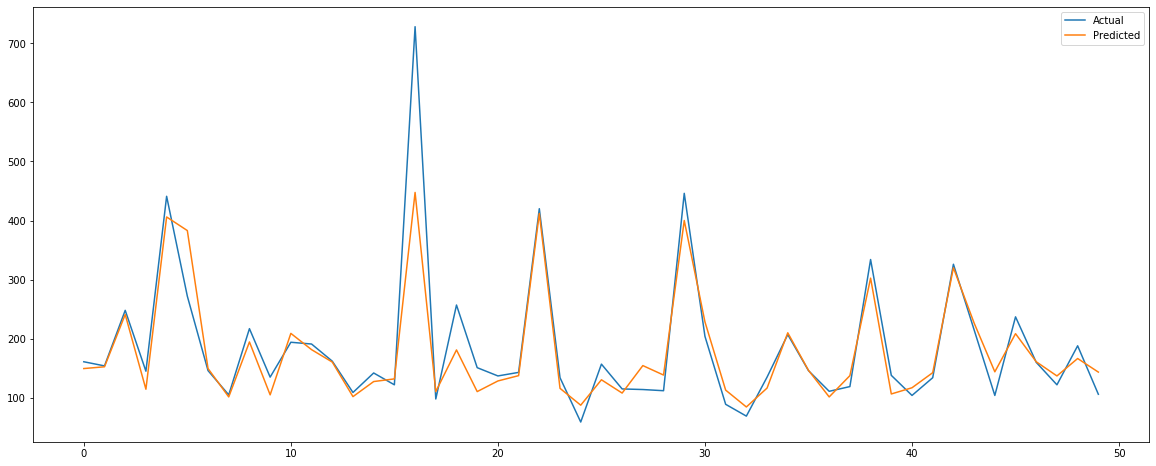

In [15]:
KNN =KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted': KNN_predict})
print(df)
df.plot(figsize=(20,8))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, KNN_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, KNN_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, KNN_predict)))
print('r ^2 ',r2_score(y_test, KNN_predict))
# print('score',ereg.score(y_test, y_pred))
print('explained_variance_score',explained_variance_score(y_test, KNN_predict))
print('max_error',max_error(y_test, KNN_predict))

    Actual  Predicted
0    161.0     175.27
1    154.0     157.76
2    248.0     238.82
3    145.0     120.79
4    441.0     414.47
5    272.0     355.68
6    146.0     161.72
7    105.0      98.14
8    217.0     204.72
9    135.0     112.99
10   194.0     173.33
11   191.0     176.62
12   162.0     158.29
13   109.0     108.43
14   142.0     128.57
15   122.0     134.63
16   728.0     462.72
17    98.0      98.26
18   257.0     218.29
19   151.0     134.02
20   137.0     139.01
21   143.0     130.94
22   420.0     440.45
23   134.0     153.93
24    59.0      78.06
25   157.0     135.44
26   115.0     106.47
27   114.0     142.20
28   112.0     135.99
29   446.0     406.37
30   204.0     227.72
31    89.0     124.74
32    69.0      90.70
33   135.0     140.27
34   207.0     230.62
35   146.0     146.64
36   111.0     102.24
37   119.0     124.18
38   334.0     380.80
39   138.0     111.58
40   104.0     113.96
41   134.0     111.49
42   326.0     335.68
43   215.0     203.55
44   104.0

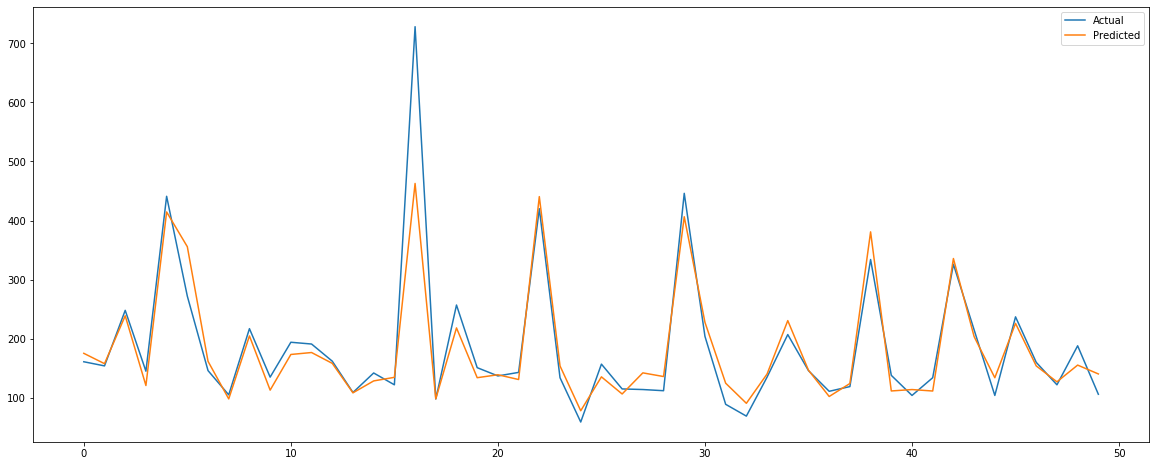

In [16]:
RF = RandomForestRegressor(random_state=1, n_estimators=100)
RF.fit(X_train, y_train)
RF_predict = RF.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted': RF_predict})
print(df)
df.plot(figsize=(20,8))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, RF_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RF_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RF_predict)))
print('r ^2 ',r2_score(y_test, RF_predict))
# print('score',ereg.score(y_test, y_pred))
print('explained_variance_score',explained_variance_score(y_test, RF_predict))
print('max_error',max_error(y_test, RF_predict))